In [2]:
# ! pip install langchain_community tiktoken langchain-openai langchainhub chromadb langchain transformers torch accelerate einops

In [10]:
# ! pip install numpy pandas 

## Get data from clinical trial.gov

In [49]:
import pandas as pd 
df_ctg = pd.read_csv('../data/ctg-smallmol-cancer.csv')

drop_cols = [col for col in df_ctg.columns if 'Unnamed' in col]
df_ctg = df_ctg.drop(columns=drop_cols)

/var/folders/55/cwx6q2h16k1f7mlmfr7md0hc0000gn/T/ipykernel_1162/4083351594.py:2: DtypeWarning: Columns (30,32,33,34,35,36,37,38,40,41,43,45,46,48,49,50,51,52,54,56,57,58,64,65,66,67,68,71,72,73,74,76,77,78,79,80,81,82,84,87,88,89,90,92,93,94,95,96,97,98,100,103,104,105,106,108,109,110,112,113,114,116,117,119,121,122,124,125,126,129,130,132,133,134,135,138,140,141,143,145,146,148,149,152,153,154,156,159,160,161,162,164,166,168,169,170,176,177,178,179,182,184,185,186,187,188,189,190,192,193,195,197,198,200,201,204,205,206,208,211,212,213,214,216,217,219,221,222,224,225,226,227,228,230,232,233,234,240,241,242,244,245,246,247,248,249,250,252,253,255,257,258,260,261,262,263,266,268,269,270,272,274,275,276,277,278,279,282,284,285,286,288,290,292,293,294,295,298,299,300,301,302,304,306,308,309,310,316,317,318,320,321,324,325,326,328,331,332,333,334,339,340,341,342,345,346,348,349,350,351,354,356,357,358,359,360,361,362,364,365,367,369,370,372,375,376,377,378,380,382,384,385,386,392,393,394,39

In [99]:
len(df_ctg.columns)

30

In [71]:
df_ctg['Brief Summary'].value_counts()

Brief Summary
SGX523 is a drug which acts by blocking the function of an enzyme called MET. MET activity may be important in growth and survival of some types of cancer. This Phase I trial is studying the safety, side effects, and best dose of SGX523 when given to patients with advanced cancer, and how well it inhibits MET activity in tumors.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       2
LEE011 

In [35]:
df_ctg['Sex'].value_counts()

Sex
United Kingdom|Novartis Investigative Site    1
Name: count, dtype: int64

In [96]:
len(ct.get_full_studies('cancer', max_studies=50, fmt='csv')[0])


30

In [98]:
ct.study_fields

{'csv': ['NCT Number',
  'Study Title',
  'Study URL',
  'Acronym',
  'Study Status',
  'Brief Summary',
  'Study Results',
  'Conditions',
  'Interventions',
  'Primary Outcome Measures',
  'Secondary Outcome Measures',
  'Other Outcome Measures',
  'Sponsor',
  'Collaborators',
  'Sex',
  'Age',
  'Phases',
  'Enrollment',
  'Funder Type',
  'Study Type',
  'Study Design',
  'Other IDs',
  'Start Date',
  'Primary Completion Date',
  'Completion Date',
  'First Posted',
  'Results First Posted',
  'Last Update Posted',
  'Locations',
  'Study Documents'],
 'json': ['NCTId',
  'BriefTitle',
  'NCTId',
  'Acronym',
  'OverallStatus',
  'BriefSummary',
  'HasResults',
  'Condition',
  'InterventionType',
  'InterventionName',
  'PrimaryOutcomeMeasure',
  'PrimaryOutcomeDescription',
  'PrimaryOutcomeTimeFrame',
  'SecondaryOutcomeMeasure',
  'SecondaryOutcomeDescription',
  'SecondaryOutcomeTimeFrame',
  'OtherOutcomeMeasure',
  'OtherOutcomeDescription',
  'OtherOutcomeTimeFrame',
  'L

In [269]:
# # ! pip install pytrials

# from pytrials.client import ClinicalTrials

# ct = ClinicalTrials()

# # Get 50 full studies related to Coronavirus and COVID in csv format.
# studies = ct.get_study_fields(
#     search_expr="breast cancer AND SEARCH[Location](AREA[LocationCountry]United States AND AREA[LocationStatus]Recruiting) AND SEARCH[Study](AREA[InterventionType]DRUG)", 
#     max_studies=1000, 
#     fields=['NCT Number',
#   'Study Title',
#   'Study URL',
#   'Acronym',
#   'Study Status',
#   'Brief Summary',
#   'Study Results',
#   'Conditions',
#   'Interventions',
#   'Primary Outcome Measures',
#   'Secondary Outcome Measures',
#   'Other Outcome Measures',
#   'Sponsor',
#   'Enrollment',
#   'Collaborators',
#   'Sex',
#   'Age',
#   'Phases', 
#   'Interventions', ])

# dt_searchres = pd.DataFrame.from_records(studies[1:], columns=studies[0])

In [270]:
# dt_searchres.columns

In [468]:
import requests
import pandas as pd

# Initial URL for the first API call
base_url = "https://clinicaltrials.gov/api/v2/studies"
params = {
    "query.cond": "breast cancer",
    "query.intr": "DRUG",
    'query.locn': "California", 
    'filter.overallStatus':  'ENROLLING_BY_INVITATION|RECRUITING' ,
    "pageSize": 100
}

# Initialize an empty list to store the data
data_list = []

# Loop until there is no nextPageToken
while True:
    # Print the current URL (for debugging purposes)
    print("Fetching data from:", base_url + '?' + '&'.join([f"{k}={v}" for k, v in params.items()]))
    
    # Send a GET request to the API
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Parse JSON response
        studies = data.get('studies', [])  # Extract the list of studies

        # Loop through each study and extract specific information
        for study in studies:
            # Safely access nested keys
            nctId = study['protocolSection']['identificationModule'].get('nctId', 'Unknown')
            briefTitle = study['protocolSection']['identificationModule'].get('briefTitle', 'Unknown')
            officialTitle = study['protocolSection']['identificationModule'].get('OfficialTitle', 'Unknown')
            briefSummary = study['protocolSection']['descriptionModule'].get('briefSummary', 'Unknown')
            overallStatus = study['protocolSection']['statusModule'].get('overallStatus', 'Unknown')
            startDate = study['protocolSection']['statusModule'].get('startDateStruct', {}).get('date', 'Unknown Date')
            conditions = ', '.join(study['protocolSection']['conditionsModule'].get('conditions', ['No conditions listed']))
            acronym = study['protocolSection']['identificationModule'].get('acronym', 'Unknown')

            # Extract interventions safely
            interventions_list = study['protocolSection'].get('armsInterventionsModule', {}).get('interventions', [])
            interventions = ', '.join([intervention.get('name', 'No intervention name listed') for intervention in interventions_list]) if interventions_list else "No interventions listed"
            
            # Extract locations safely
            locations_list = study['protocolSection'].get('contactsLocationsModule', {}).get('locations', [])
            # location_facilities = 
            locations = ', '.join([f"{location.get('city', 'No City')} / {location.get('state', 'No State')} / {location.get('country', 'No Country')}" for location in locations_list]) if locations_list else "No locations listed"
        
            # Extract contact info 
            centralContact = study['protocolSection'].get('contactsLocationsModule', {}).get('centralContacts', [])
            contact = ', '.join([f"{contact.get('name', 'No Name')} - {contact.get('role', 'No Role')} - {contact.get('phone', 'No Phone')} - {contact.get('phoneExt', 'No phoneExt')} - {contact.get('email', 'No email')}" for contact in centralContact]) if centralContact else "No contact listed"
            

            # Extract dates and phases
            primaryCompletionDate = study['protocolSection']['statusModule'].get('primaryCompletionDateStruct', {}).get('date', 'Unknown Date')
            studyFirstPostDate = study['protocolSection']['statusModule'].get('studyFirstPostDateStruct', {}).get('date', 'Unknown Date')
            lastUpdatePostDate = study['protocolSection']['statusModule'].get('lastUpdatePostDateStruct', {}).get('date', 'Unknown Date')
            studyType = study['protocolSection']['designModule'].get('studyType', 'Unknown')
            phases = ', '.join(study['protocolSection']['designModule'].get('phases', ['Not Available']))

            # Extract eligibility requirements safely 
            eligibilityCriteria = study['protocolSection']['eligibilityModule'].get('eligibilityCriteria', {})
            sex = study['protocolSection']['eligibilityModule'].get('sex', {})
            genderDescription = study['protocolSection']['eligibilityModule'].get('genderDescription', 'Unknown')
            minimumAge = study['protocolSection']['eligibilityModule'].get('minimumAge', 'Unknown')
            maximumAge = study['protocolSection']['eligibilityModule'].get('maximumAge', 'Unknown')
            # phases = ', '.join(study['protocolSection']['designModule'].get('phases', ['Not Available']))

            # Append the data to the list as a dictionary
            data_list.append({
                "NCT ID": nctId,
                "Acronym": acronym,
                "briefTitle": briefTitle, 
                # "officialTitle": officialTitle, 
                "briefSummary": briefSummary, 
                "Overall Status": overallStatus,
                "Start Date": startDate,
                "Conditions": conditions,
                "Interventions": interventions,
                "Locations": locations,
                "Contact": contact, 
                "Primary Completion Date": primaryCompletionDate,
                "Study First Post Date": studyFirstPostDate,
                "Last Update Post Date": lastUpdatePostDate,
                "Study Type": studyType,
                "Phases": phases,
                
                # 
                "Eligibility Criteria": eligibilityCriteria,
                "Sex": sex,
                # "Gender": genderDescription,
                "Min Age": minimumAge,
                "Max Age": maximumAge,
            })

        # Check for nextPageToken and update the params or break the loop
        nextPageToken = data.get('nextPageToken')
        if nextPageToken:
            params['pageToken'] = nextPageToken  # Set the pageToken for the next request
        else:
            break  # Exit the loop if no nextPageToken is present
    else:
        print("Failed to fetch data. Status code:", response.status_code, response.text)
        break

Fetching data from: https://clinicaltrials.gov/api/v2/studies?query.cond=breast cancer&query.intr=DRUG&query.locn=California&filter.overallStatus=ENROLLING_BY_INVITATION|RECRUITING&pageSize=100
Fetching data from: https://clinicaltrials.gov/api/v2/studies?query.cond=breast cancer&query.intr=DRUG&query.locn=California&filter.overallStatus=ENROLLING_BY_INVITATION|RECRUITING&pageSize=100&pageToken=NF0g5JKDlPAqxQc
Fetching data from: https://clinicaltrials.gov/api/v2/studies?query.cond=breast cancer&query.intr=DRUG&query.locn=California&filter.overallStatus=ENROLLING_BY_INVITATION|RECRUITING&pageSize=100&pageToken=NF0g5JCCk_gswwc


In [469]:
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)

# # Print the DataFrame
# print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv("clinical_trials_data_search_res.csv", index=False)

In [470]:
df['Contact'].values[4]

'Nurix Therapeutics Patient Outreach - CONTACT - 4152307815 - 7815 - nx1607101@nurixtx.com'

In [321]:
from markdown import Markdown
from io import StringIO


def unmark_element(element, stream=None):
    if stream is None:
        stream = StringIO()
    if element.text:
        stream.write(element.text)
    for sub in element:
        unmark_element(sub, stream) 
    if element.tail:
        stream.write(element.tail)
    return stream.getvalue()


# patching Markdown
Markdown.output_formats["plain"] = unmark_element
__md = Markdown(output_format="plain")
__md.stripTopLevelTags = False


def unmark(text):
    return __md.convert(text)

In [322]:
unmark(df['Eligibility Criteria'][2])

'Inclusion Criteria:\n\nRecurrent or advanced solid tumor and has disease progression after treatment with available anti-cancer therapies known to confer benefit or is intolerant to treatment.\nEastern Cooperative Oncology Group (ECOG) performance status 0 or 1\nAt least one measurable lesion(s) as defined by RECIST version 1.1.\nTumor tissue, either archival or from a fresh tumor biopsy, available for testing or be willing to undergo a minimally invasive tumor biopsy to obtain tumor tissue for local testing, if not medically contraindicated, prior to Cycle 1 Day 1\n\nBrain magnetic resonance imaging (MRI) during the Pre- Screening/Screening period unless obtained within 30 days prior to enrollment (based on standard clinical care), if they meet either of the following criteria:\n\n\nAll participants with TNBC\n\nParticipants with a history of brain metastases or with neurologic symptoms or signs suspicious for brain metastases.\n\nExclusion Criteria:\n\nPrior treatment with an Antibo

In [314]:
df.columns

Index(['NCT ID', 'Acronym', 'briefTitle', 'briefSummary', 'Overall Status',
       'Start Date', 'Conditions', 'Interventions', 'Locations',
       'Primary Completion Date', 'Study First Post Date',
       'Last Update Post Date', 'Study Type', 'Phases', 'Eligibility Criteria',
       'Sex', 'Min Age', 'Max Age'],
      dtype='object')

## Data visualization

- age, study type, phase, Sex, min age, max age. 
- location 

In [289]:
df_st = df['Study Type'].value_counts().reset_index(name='counts')
df_st

,Study Type,counts
0,INTERVENTIONAL,202
1,OBSERVATIONAL,4


<Figure size 1500x1500 with 0 Axes>

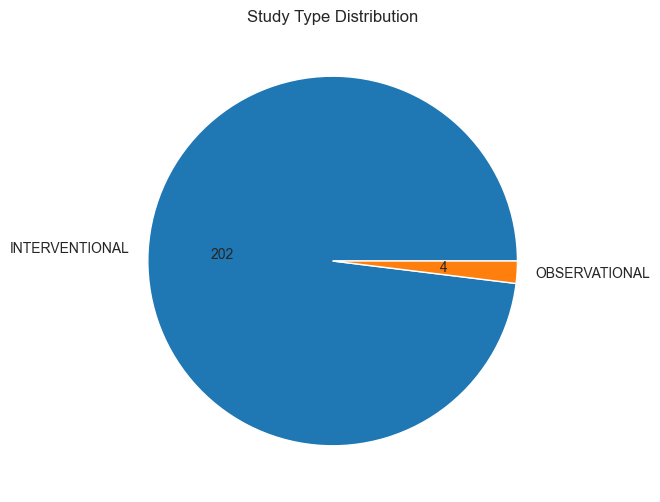

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_st['counts'], labels=df_st['Study Type'], autopct=lambda x: '{:.0f}'.format(x*df_st['counts'].sum()/100))
plt.title('Study Type Distribution')
plt.show()

In [361]:
df_p = df['Phases'].value_counts().reset_index(name='counts')

non_phases_terms = [term for term in df_p['Phases'].values if 'phase' not in term.lower()]
df_p.loc[len(df_p.index)] = ['N/A', df_p[df_p['Phases'].isin(non_phases_terms)].counts.sum()] 
df_p = df_p[~df_p['Phases'].isin(non_phases_terms)] 

In [370]:
df_p

,Phases,counts
0,PHASE2,49
1,"PHASE1, PHASE2",49
2,PHASE3,44
3,PHASE1,42
6,EARLY_PHASE1,3
7,PHASE4,3
8,"PHASE2, PHASE3",1
9,N/A,9


In [369]:
pd.Series(df_p.counts.values,index=df_p.Phases).to_dict()

{'PHASE2': 49,
 'PHASE1, PHASE2': 49,
 'PHASE3': 44,
 'PHASE1': 42,
 'EARLY_PHASE1': 3,
 'PHASE4': 3,
 'PHASE2, PHASE3': 1,
 'N/A': 9}

In [363]:
df_p.to_dict()

{'Phases': {0: 'PHASE2',
  1: 'PHASE1, PHASE2',
  2: 'PHASE3',
  3: 'PHASE1',
  6: 'EARLY_PHASE1',
  7: 'PHASE4',
  8: 'PHASE2, PHASE3',
  9: 'N/A'},
 'counts': {0: 49, 1: 49, 2: 44, 3: 42, 6: 3, 7: 3, 8: 1, 9: 9}}

<Figure size 1500x1500 with 0 Axes>

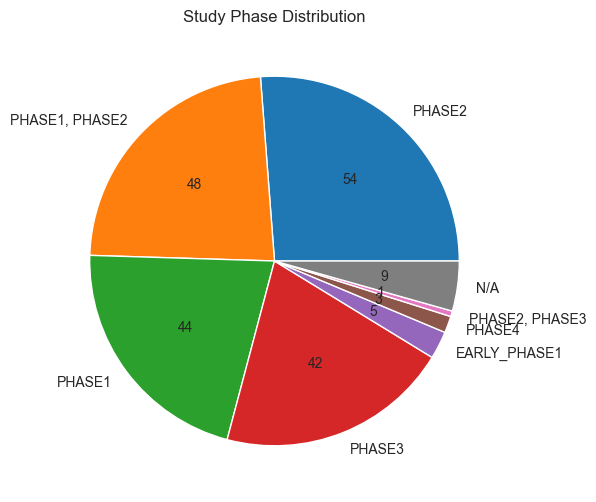

In [292]:
plt.figure(figsize=(15,15))

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_p['counts'], labels=df_p['Phases'], autopct=lambda x: '{:.0f}'.format(x*df_p['counts'].sum()/100))
plt.title('Study Phase Distribution')
plt.show()

In [293]:
df_s = df['Sex'].dropna().value_counts().reset_index(name='counts')
df_s

,Sex,counts
0,ALL,176
1,FEMALE,30


In [356]:
data_st = df['Study Type'].value_counts().to_dict()

In [357]:
data_st

{'INTERVENTIONAL': 196, 'OBSERVATIONAL': 4}

<Figure size 1500x1500 with 0 Axes>

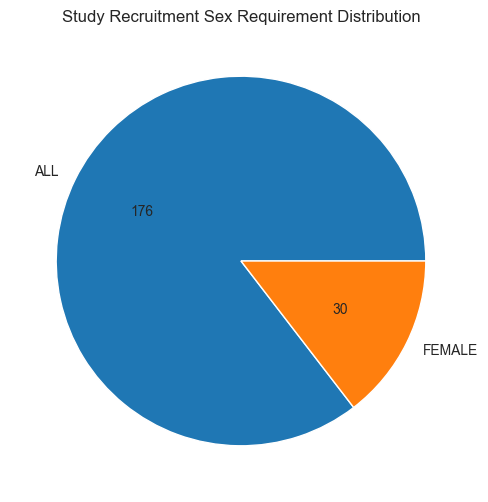

In [294]:
plt.figure(figsize=(15,15))

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df_s['counts'], labels=df_s['Sex'], autopct=lambda x: '{:.0f}'.format(x*df_s['counts'].sum()/100))
plt.title('Study Recruitment Sex Requirement Distribution')
plt.show()

In [295]:
df_stat = df[df['Min Age']].dropna().value_counts().reset_index(name='counts')

In [339]:
df_ = df.copy()

In [340]:
df_['Min Age'].replace('Unknown', '0 years', inplace=True)
df_['Max Age'][df_['Max Age'] == 'Unknown'] = df_['Min Age']
# df['Max Age'].replace('Unknown', '150 years', inplace=True)

df_['Min Age'] = df_['Min Age'].apply(lambda x: [int(i) for i in x.split() if i.isdigit()][0])
df_['Max Age'] = df_['Max Age'].apply(lambda x: [int(i) for i in x.split() if i.isdigit()][0])

/var/folders/55/cwx6q2h16k1f7mlmfr7md0hc0000gn/T/ipykernel_1162/3407202918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Min Age'].replace('Unknown', '0 years', inplace=True)
/var/folders/55/cwx6q2h16k1f7mlmfr7md0hc0000gn/T/ipykernel_1162/3407202918.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will neve

In [341]:
df_[['Min Age', 'Max Age']]

,Min Age,Max Age
0,0,0
1,18,75
2,18,18
3,18,18
4,18,18
...,...,...
201,18,18
202,18,70
203,18,18
204,18,18


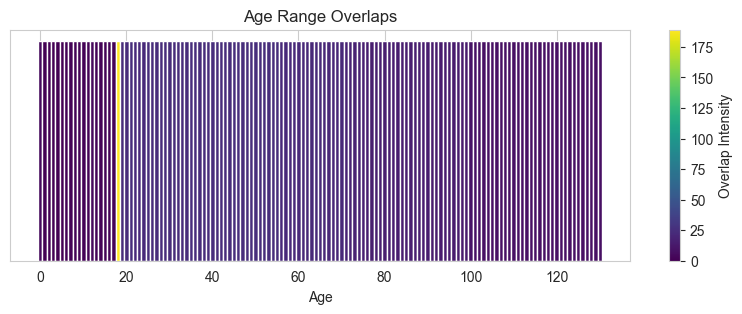

In [352]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sample data
data = {
    'min_age': df_['Min Age'].values,
    'max_age': df_['Max Age'].values
}

# Create an array for age counts
max_age = max(data['max_age'])
age_counts = np.zeros(max_age + 1)  # Include max_age

# Increment counts for each range in the array
for min_age, max_age in zip(data['min_age'], data['max_age']):
    age_counts[min_age:max_age + 1] += 1

# Plotting
fig, ax = plt.subplots(figsize=(10, 3))
cmap = plt.get_cmap('viridis')  # Use a blue color map
norm = mcolors.Normalize(vmin=np.min(age_counts), vmax=np.max(age_counts))

ax.bar(range(len(age_counts)), [1] * len(age_counts), color=cmap(norm(age_counts)), width=1)
ax.set_yticks([])
ax.set_xlabel('Age')
ax.set_title('Age Range Overlaps')

# Creating a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, orientation='vertical', label='Overlap Intensity')

plt.show()


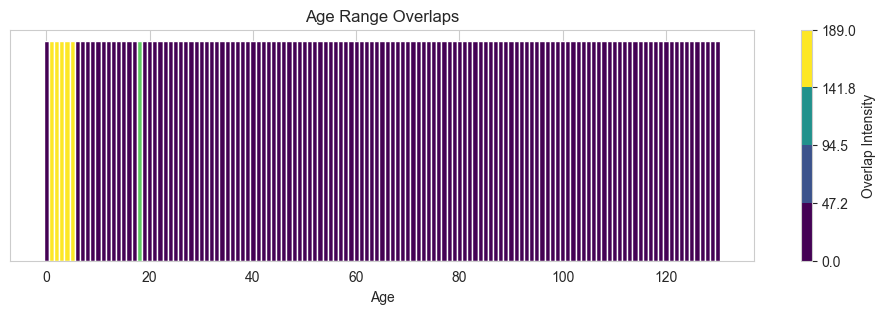

In [351]:
# Define 10 color groups
max_count = np.max(age_counts)
color_bins = np.linspace(0, max_count, 5)  # Generate 11 edges for 10 bins
color_indices = np.digitize(age_counts, color_bins, right=True) - 1  # Map counts to bins

# Color map with 10 discrete colors
cmap = plt.get_cmap('viridis')  # 'tab10' colormap has 10 distinct colors
colors = cmap(np.linspace(0, 1, 5))

# Plotting
fig, ax = plt.subplots(figsize=(12, 3))
bars = ax.bar(range(len(age_counts)), [1] * len(age_counts), color=colors[color_indices], width=1)

ax.set_yticks([])
ax.set_xlabel('Age')
ax.set_title('Age Range Overlaps')

# Creating a colorbar with 10 discrete colors
cmap_discrete = mcolors.ListedColormap(colors)
bounds = color_bins
norm = mcolors.BoundaryNorm(bounds, cmap_discrete.N)
sm = plt.cm.ScalarMappable(cmap=cmap_discrete, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, boundaries=bounds, ticks=bounds, spacing='proportional')
cbar.set_label('Overlap Intensity')

plt.show()

In [483]:
cities_list = [cities.split(', ') for cities in df['Locations'].values.tolist()]
cities_list = [city for cities in cities_list for city in cities if '/' in city and len(city.split(' / '))==3]
cities = [city.split(' / ')[0] for city in cities_list]
states = [city.split(' / ')[1] for city in cities_list]
countries = [city.split(' / ')[2] for city in cities_list]

In [477]:
# for city in cities_list: 
#     try: 
#         a = city.split(' / ')
#         assert len(a)==3
#     except: 
#         print(city)

In [484]:
df_locs = pd.DataFrame(data={'city':cities, 'state':states, 'country':countries})
df_locs = df_locs.value_counts().reset_index(name='counts')
df_locs 

,city,state,country,counts
0,Seoul,No State,Korea,185
1,Las Vegas,Nevada,United States,159
2,New York,New York,United States,156
3,Houston,Texas,United States,150
4,Madrid,No State,Spain,132
...,...,...,...,...
3854,Meldola,FC,Italy,1
3855,Melbourne,Florida,United States,1
3856,Meizhou,Other,China,1
3857,Bengbu City,No State,China,1


In [485]:
df_cities_geo = pd.read_csv('../data/worldcities.csv')
df_cities_geo

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
47863,Munha-dong,Munha-dong,39.3813,127.2517,"Korea, North",KP,PRK,Kangwŏn,NaN,NaN,1408979215
47864,Sil-li,Sil-li,39.4880,125.4640,"Korea, North",KP,PRK,P’yŏngnam,NaN,NaN,1408767958
47865,Muan,Muan,34.9897,126.4714,"Korea, South",KR,KOR,Jeonnam,admin,NaN,1410001061
47866,Hongseong,Hongseong,36.6009,126.6650,"Korea, South",KR,KOR,Chungnam,admin,NaN,1410822139


In [490]:
df_mm = pd.merge(df_locs, df_cities_geo[['city', 'lat', 'lng', 'admin_name', 'country']], left_on=['city', 'state', 'country'], right_on=['city', 'admin_name', 'country'], how='inner')

In [491]:
df_mm

,city,state,country,counts,lat,lng,admin_name
0,Las Vegas,Nevada,United States,159,36.2333,-115.2654,Nevada
1,New York,New York,United States,156,40.6943,-73.9249,New York
2,Houston,Texas,United States,150,29.7860,-95.3885,Texas
3,Boston,Massachusetts,United States,127,42.3188,-71.0852,Massachusetts
4,Los Angeles,California,United States,117,34.1141,-118.4068,California
...,...,...,...,...,...,...,...
1355,Belo Horizonte,Minas Gerais,Brazil,1,-19.9167,-43.9333,Minas Gerais
1356,Midland,Texas,United States,1,32.0243,-102.1147,Texas
1357,Belém,Pará,Brazil,1,-1.4558,-48.5039,Pará
1358,Metairie,Louisiana,United States,1,29.9977,-90.1780,Louisiana


In [496]:
df.loc[0]['briefTitle']

'A Study of U3-1402 (Patritumab Deruxtecan) in Subjects With Metastatic Breast Cancer'

## OpenAI API

In [497]:
## API 

# Once you add your API key below, make sure to not share it with anyone! The API key should remain private.


In [2]:
from openai import OpenAI

# Import prerequisite libraries
import os
import openai

# Setting the API key
openai.api_key = os.environ['OPENAI_API_KEY']

client = OpenAI(
    # This is the default and can be omitted
    api_key=openai.api_key,
)

In [4]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Say this is a test",
        }
    ],
    model="gpt-3.5-turbo",
)

In [10]:
from openai import OpenAI
client = OpenAI()

summary='This clinical trial compares two supplemental topical agents (Aquaphor and Miaderm) for the treatment of acute radiation dermatitis in patients with breast cancer undergoing radiation therapy. Radiation dermatitis is a radiation-induced skin reaction which can cause itching, swelling, pain, and general discomfort. Aquaphor is a commonly available, inexpensive, petrolatum-based multi-purpose ointment designed to protect and sooth extremely dry skin, chapped lips, cracked hands and feet, minor cuts and burns, and many other skin irritations. Miaderm is a water-based cream and contains ingredients like calendula, hyaluronate, and aloe vera which may help reduce occurrence and severity of radiation dermatitis. Both are commonly recommended and used by breast cancer patients undergoing external beam radiation therapy (EBRT). However, it is not known whether one is better than the other in treating or preventing radiation dermatitis.'

simple_summarizer = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a clinical trial assistant. \
     Your job is to facilitate clinical trials by explaining a trial based on the given brief summary. \
     You use simplified language to explain the trial, so that complex medical word can be understood by people without medical background. \
     Example: if the term 'topical agents' is in the prompt, you should explain that it means 'medication that is applied to the area being treated, such as in lotion form'.  \
     Your tone is precise, objective, and prefer simple words to explain concepts. \
     The expected output should not exceed the original brief summary user has given to you. "},
    {"role": "user", "content": "Summarize and explain this trial based on the brief summary: "+summary}
  ]
)

print(simple_summarizer.choices[0].message.content)

This trial is comparing two different lotions, Aquaphor and Miaderm, to see which one is better for treating skin reactions caused by radiation in breast cancer patients receiving radiation therapy. Aquaphor is a petrolatum-based ointment that helps with dry skin, chapped lips, and other skin irritations, while Miaderm is a water-based cream with ingredients like calendula and aloe vera that may reduce the severity of radiation dermatitis. Patients often use these products during external beam radiation therapy, but it's unclear which one is more effective.


In [11]:
print(simple_summarizer.choices[0].message.content)

This trial is comparing two different lotions, Aquaphor and Miaderm, to see which one is better for treating skin reactions caused by radiation in breast cancer patients receiving radiation therapy. Aquaphor is a petrolatum-based ointment that helps with dry skin, chapped lips, and other skin irritations, while Miaderm is a water-based cream with ingredients like calendula and aloe vera that may reduce the severity of radiation dermatitis. Patients often use these products during external beam radiation therapy, but it's unclear which one is more effective.


In [ ]:
from openai import OpenAI
client = OpenAI()

elig_summarizer="You are a clinical trial assistant who is explaining the eligibility criteria of a trial. \
     Your job is to simplify this explanation process by categorizing the given eligibility criteria into 2 categories, personal information based and clinical information based. \
     In the personal information category, criteria included under this section should be about the patient's demographic, such as age, sex, and medical history. These should be information patient can answer. \
     For the clinical information category, criteria included under this section may be about specific clinical test or lab test results, such as physiological and biochemical measurements like platelets counts. These are information that patient likely do not know right off the bat and need to be obtained in hospitals. \
     Write each distinct criterion as a concisely worded point, and clearly distinct between inclusion and exclusion criteria. \
     Your result should contain 2 large sections each with 2 subfields - personal information (inclusion) and personal information (exclusion), and clinical information (inclusion) and clinical information (exclusion). \
     You use simplified language to explain the trial, so that complex medical word can be understood by people without medical background. \
     Your tone is precise, objective, and prefer simple words to explain concepts. \
     The expected output should not exceed the original brief summary user has given to you, and summarized points should be as concise as possible. "


elig_criteria = ''

simple_summarizer = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": elig_summarizer},
    {"role": "user", "content": "Summarize and explain this trial based on the brief summary: "+summary}
  ]
)

print(simple_summarizer.choices[0].message.content)

Eligibility Criteria:

Inclusion criteria for Part A and B (HER2-negative) and Part Z (HER2-positive) cohorts:

1. Written informed consent, according to local guidelines, signed and dated by the patient or by a legal guardian prior to the performance of any study-specific procedures, sampling, or analyses
2. Women and men at least 18 years-of-age at the time of signature of the informed consent form (ICF)
3. Histologically documented locally advanced or metastatic breast cancer
4. Triple-negative breast cancer (TNBC) patients should have received at least 1 but no more than 5 prior lines of chemotherapy in the metastatic setting
5. Parts A and B patients only: Patients with HR+ HER2-negative MBC should have received prior treatment with endocrine therapy +CDK 4/6 inhibitor. No limit to prior endocrine therapy regimens, but no more than 2 prior chemotherapy regimens in the metastatic setting are allowed. HR+ = Estrogen receptor (ER) and/or Progesterone (PgR) positivity that are defined as ≥1% of cells expressing HR via IHC analysis. HER2 negativity is defined as either of the following: IHC 0, IHC 1+, or IHC 2+/in situ hybridization (ISH) negative.
6. Part B patients only: Patients with HER2-negative MBC will be included into one of the following 2 subgroups: 1) MBC HR+, HER2-, regardless of HER3 expression, who have received trastuzumab deruxtecan and/or sacituzumab govitecan, or, 2) mTNBC, regardless of HER3 expression, who have received sacituzumab govitecan and/or datopotamab deruxtecan.
7. Part Z patients only: should have documented HER2-positive expression as per American Society of Clinical Oncology - College of American Pathologists guidelines based on local testing.
8. Part Z patients only: should have had prior treatment with at least 2 anti-HER2 therapies, 1 of which must be trastuzumab deruxtecan. These patients must have experienced disease progression after receiving trastuzumab deruxtecan.
9. At least 1 measurable lesion per Response Evaluation Criteria in Solid Tumors (RECIST) v1.1 (bone-only disease excluded)
10. Patients who have received radiation or surgery for brain metastases are eligible if therapy was completed ≥4 weeks prior to initiation of study treatment (2 weeks for patients who received palliative radiation therapy), there is no evidence of central nervous system disease progression on a scan or mild neurologic symptoms, and there is no requirement for chronic corticosteroid therapy for the treatment of brain metastases
11. Willingness to undergo pre-treatment biopsy and on-treatment biopsies; must have a tumor amenable to pre-treatment biopsy (unless archived tissue is available and was obtained within 2 months prior to starting treatment) and on-treatment biopsy (excludes bone lesions and previously irradiated lesions)
12. Eastern Cooperative Oncology Group (ECOG) Performance Status score of 0 or 1
13. Has adequate organ function within 7 days before the start of study treatment, defined as:

    * Platelet count ≥100 × 109/L
    * Hemoglobin (Hb) ≥9 g/dL (transfusion and/or growth factor support allowed)
    * Absolute neutrophil count ≥1.5 × 109/L
    * Prothrombin time (PT) and partial thromboplastin time (PTT) ≤1.5 × the upper limit of normal (ULN), except for patients on coumadin-derivative anticoagulants or other similar anticoagulant therapy, who must have PT-international normalized ratio (INR) within therapeutic range as deemed appropriate by the Investigator
    * Serum creatinine ≤1.5 × ULN, or creatinine clearance ≥50 mL/min as calculated using the modified Cockcroft-Gault equation; confirmation of creatinine clearance is only required when creatinine is \>1.5 × ULN
    * AST/ALT ≤3 × ULN (if liver metastases are present, ≤5 × ULN)
    * Total bilirubin ≤1.5 × ULN if no liver metastases or \<3 × ULN in the presence of documented Gilbert's syndrome or liver metastases
    * Serum albumin ≥2.5 g/dL
14. Male patients with female partners of childbearing potential and female patients of childbearing potential are required to use two forms of acceptable contraception, including one barrier method, during their participation in the study and for at least 7 months following last dose. Male patients must also refrain from donating sperm during their participation in the study.

Exclusion Criteria

Patients who meet any of the following criteria will be excluded from study entry:

Exclusion criteria for Parts A and B (HER2-negative) and Part Z (HER2-positive) cohorts:

1. Treatment with any of the following:

   * Any systemic anti-cancer chemotherapy, small molecule, biologic, hormonal agent, or immune checkpoint inhibitor therapy from a previous treatment regimen or clinical study within 21 days prior to the first dose of patritumab deruxtecan
   * Prior treatment with any HER3-targeting agent
   * Major surgery (excluding placement of vascular access) within 4 weeks of the first dose of study drug treatment
   * Radiotherapy treatment to more than 30% of the bone marrow or with a wide field of radiation within 4 weeks of the first dose of study drug treatment, or palliative radiation therapy within 2 weeks of the first dose of study drug treatment
   * Chloroquine /hydroxychloroquine ≤14 days prior to the first dose of study drug treatment
2. Has any hypersensitivity to drug substances or inactive ingredients in drug product
3. Has any history of ILD (including pulmonary fibrosis or radiation pneumonitis), has clinically significant ILD, or is suspected to have such disease by imaging during screening. If imaging findings are unlikely to indicate a history of pneumonitis, then the Investigator should discuss the considerations with the Medical Monitor about potential enrollment and record the reasoning in the source documentation.
4. Clinically severe pulmonary compromise (based on Investigator's assessment) resulting from intercurrent pulmonary illnesses including, but not limited to:

   * Any underlying pulmonary disorder (e.g., pulmonary emboli, severe asthma, severe chronic obstructive pulmonary disease, restrictive lung disease, pleural effusion)
   * Any autoimmune, connective tissue or inflammatory disorder with pulmonary involvement (e.g., rheumatoid arthritis, Sjögren's syndrome, sarcoidosis)

   OR prior pneumonectomy
5. With the exception of alopecia, any unresolved toxicities from prior therapy greater than Common Terminology Criteria for Adverse Events (CTCAE) Grade 1 or baseline at the time of starting study treatment. Note: patients with chronic Grade 2 toxicities who are asymptomatic or adequately managed with stable medication may be eligible with approval by the Medical Monitor.
6. Leptomeningeal metastases or evidence of spinal cord compression or brain metastases, defined as being clinically active and symptomatic, or requiring therapy with corticosteroids or anticonvulsants to control associated symptoms. Patients with clinically inactive or treated brain metastases who are asymptomatic (i.e., without neurologic signs or symptoms and do not require treatment with corticosteroids or anticonvulsants) may be included in the study. Patients must have a stable neurologic status for at least 2 weeks prior to Cycle 1 Day 1.
7. Women who are pregnant, nursing, or plan to become pregnant while in the study and for at least 7 months after the last administration of study treatment
8. Men who plan to father a child while in the study and for at least 7 months after the last administration of study treatment
9. Uncontrolled or significant cardiovascular disorder prior to Cycle 1 Day 1, including:

   * Mean resting corrected QT interval using Fridericia's formula (QTcF) prolongation to \>470 ms for females and \>450 ms for males in three successive screening measurements
   * Patients with a left ventricular ejection fraction (LVEF) \<50%
   * Resting systolic blood pressure \>180 mmHg or diastolic blood pressure \>110 mmHg).
   * Documented myocardial infarction within 6 months
   * Congestive heart failure (New York Heart Association ≥ Grade 2 within 28 days
10. Has known clinically significant corneal disease from prior therapies such as drug-induced keratitis
11. Is receiving chronic systemic corticosteroids dosed at \>10 mg prednisone or equivalent anti-inflammatory activity or any form of immunosuppressive therapy prior to Cycle 1 Day 1. Patients who require use of bronchodilators, inhaled or topical steroids, or local steroid injections may be included in the study.
12. As judged by the Investigator, any evidence of severe or uncontrolled systemic diseases, including uncontrolled hypertension, uncontrolled diabetes mellitus, active bleeding diatheses, or active infection, including hepatitis B, hepatitis C, and human immunodeficiency virus. Screening for chronic conditions is not required.
13. Presence of other active invasive cancers other than the one treated in this study within 3 years prior to screening, except appropriately treated basal cell carcinoma of the skin, in situ carcinoma of uterine cervix, or other local tumors considered cured by local treatment
14. Psychological, familial, sociological, or geographical conditions that do not permit compliance with the protocol and/or follow-up procedures outlined in the protocol

    Additional exclusion criteria only for Parts A and B (HER2-negative) cohorts:
15. Patients with HER2+ breast cancer per ASCO-CAP guidelines
16. Part A only: Prior treatment with an antibody drug conjugate that consists of an exatecan derivative that is a topoisomerase I inhibitor (e.g., trastuzumab deruxtecan, DS-1062a \[datopotamab deruxtecan\], and DS-7300a \[B7-H3 DXd-ADC\])
17. Part B patients only: Prior treatment with trastuzumab deruxtecan, sacituzumab govitecan, and/or datopotamab deruxtecan with any of the following:

    * A severe reaction or severe tolerability issues that necessitated stopping treatment with the therapy
    * Any unresolved toxicities from the prior therapy greater than Grade 1, with the exception of alopecia

    Additional exclusion criteria only for Part Z (HER2-positive) cohort:
18. Treatment with any of the following:

    * Prior treatment with an antibody drug conjugate that consists of an exatecan derivative that is a topoisomerase I inhibitor except trastuzumab deruxtecan
    * Prior treatment with trastuzumab deruxtecan within 4 weeks prior to the first dose of patritumab deruxtecan
19. Uncontrolled or significant cardiovascular disease, including history of myocardial infarction within 6 months before enrollment
20. A severe reaction or severe tolerability issues that necessitated stopping treatment with trastuzumab deruxtecan
21. Any unresolved toxicities from prior therapy with trastuzumab deruxtecan

## RAG Pipeline

For generating categorized, easily patient-screenable assistant

In [2]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = ''

In [5]:
# ! pip install faiss-cpu sentence-transformers

In [3]:
from transformers import AutoTokenizer, AutoModel

from tqdm import tqdm
## https://huggingface.co/medicalai/ClinicalBERT
tokenizer = AutoTokenizer.from_pretrained("medicalai/ClinicalBERT")
model = AutoModel.from_pretrained("medicalai/ClinicalBERT")


/Users/jessysong/miniforge3/envs/trialCompare/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jessysong/miniforge3/envs/trialCompare/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [72]:
from langchain.document_loaders import HuggingFaceDatasetLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from transformers import AutoTokenizer, pipeline
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA

In [73]:
# Define a question-answering pipeline using the model and tokenizer
question_answerer = pipeline(
    "question-answering", 
    model=model, 
    tokenizer=tokenizer,
    return_tensors='pt'
)

# Create an instance of the HuggingFacePipeline, which wraps the question-answering pipeline
# with additional model-specific arguments (temperature and max_length)
llm = HuggingFacePipeline(
    pipeline=question_answerer,
    model_kwargs={"temperature": 0.7, "max_length": 512},
)

The model 'DistilBertModel' is not supported for question-answering. Supported models are ['AlbertForQuestionAnswering', 'BartForQuestionAnswering', 'BertForQuestionAnswering', 'BigBirdForQuestionAnswering', 'BigBirdPegasusForQuestionAnswering', 'BloomForQuestionAnswering', 'CamembertForQuestionAnswering', 'CanineForQuestionAnswering', 'ConvBertForQuestionAnswering', 'Data2VecTextForQuestionAnswering', 'DebertaForQuestionAnswering', 'DebertaV2ForQuestionAnswering', 'DistilBertForQuestionAnswering', 'ElectraForQuestionAnswering', 'ErnieForQuestionAnswering', 'ErnieMForQuestionAnswering', 'FalconForQuestionAnswering', 'FlaubertForQuestionAnsweringSimple', 'FNetForQuestionAnswering', 'FunnelForQuestionAnswering', 'GPT2ForQuestionAnswering', 'GPTNeoForQuestionAnswering', 'GPTNeoXForQuestionAnswering', 'GPTJForQuestionAnswering', 'IBertForQuestionAnswering', 'LayoutLMv2ForQuestionAnswering', 'LayoutLMv3ForQuestionAnswering', 'LEDForQuestionAnswering', 'LiltForQuestionAnswering', 'LlamaForQu

In [77]:
import bs4
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_community.document_loaders import WebBaseLoader
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders.csv_loader import CSVLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

from datasets import load_dataset

# Specify the dataset name and the column containing the content
dataset_path = "../data/"
page_content_column = "Brief Summary"  # or any other column you're interested in

def load_documents():
    loader = DirectoryLoader(dataset_path, glob="*.csv", 
                             loader_cls=CSVLoader)
    documents = loader.load()
    return documents

smallmol_cancer_docs = load_documents()

In [78]:
smallmol_cancer_docs[:2]

[Document(page_content="NCT Number: NCT01747876\nStudy Title: Study of Safety and Efficacy in Patients With Malignant Rhabdoid Tumors (MRT) and Neuroblastoma\nStudy URL: https://clinicaltrials.gov/study/NCT01747876\nAcronym: \nStudy Status: TERMINATED\nBrief Summary: LEE011 is a small molecule inhibitor of CDK4/6. LEE011 has demonstrated in vitro and in vivo activity in both tumor models. The primary purpose of this study was to determine the maximum tolerated dose (MTD) and/or recommended dose for expansion (RDE) in pediatric patients and to delineate a clinical dose to be used in future studies. This study was also to have assessed the safety, tolerability, PK and preliminary evidence of antitumor activity of LEE011 in patients with MRT or neuroblastoma.\nStudy Results: YES\nConditions: Malignant Rhabdoid Tumors (MRT)|Neuroblastoma\nInterventions: DRUG: LEE011\nPrimary Outcome Measures: Incidence Rate of Dose Limiting Toxicities (DLTs) by Primary System Organ Class, Preferred Term an

## based on current design, gather results from similar trials, highlight differences between them and potential downfall of the trials. 

- Give out suggestions to CRA and trial conductors 

In [15]:
#### INDEXING ####

# Load Documents
# loader = WebBaseLoader(
#     web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
#     bs_kwargs=dict(
#         parse_only=bs4.SoupStrainer(
#             class_=("post-content", "post-title", "post-header")
#         )
#     ),
# )
# docs = loader.load()

# Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(smallmol_cancer_docs)

# Embed
vectorstore = Chroma.from_documents(documents=splits, 
                                    embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

#### RETRIEVAL and GENERATION ####

# Prompt
prompt = hub.pull("rlm/rag-prompt")



# LLM
# llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Question
rag_chain.invoke("What is Task Decomposition?")


ValidationError: 1 validation error for OpenAIEmbeddings
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)